In [1]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# file path
os.chdir('C:\\Users\\Khizar\\Desktop\\Semester - Spring 2021\\5 - Machine Learning 4375\\CSV')
path = os.getcwd()
path

# data frame set to data file
df = pd.read_csv('iris.csv')

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# check how much is missing. How many null values in columns
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
# 0% of the data is missing. But still dropping null vals just in case
df = df.dropna()

In [6]:
pd.get_dummies(df)

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [7]:
# checking amount
df.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


<AxesSubplot:>

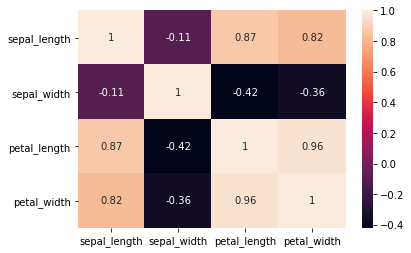

In [8]:
# creating heatmap
sns.heatmap(df.corr(), annot=True)

In [9]:
# Setting x and y. y is species, x is the rest of the columsn
x = pd.get_dummies(df.drop('species', axis = 1), drop_first = True)
y = df['species'] 

In [10]:
# more imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

# doing test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

# creating random forest model
model = RandomForestClassifier(n_estimators = 10, max_features = 'auto', random_state = 101)
model.fit(x_train, y_train)
# putting x test and predicting
predicting = model.predict(x_test)

In [11]:
# These are names for different possible flower combinations (species)
print(predicting)

['setosa' 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'virginica' 'versicolor']


In [12]:
# printing confusion matrix
print(confusion_matrix(y_test, predicting))

[[13  0  0]
 [ 0 19  1]
 [ 0  2 10]]


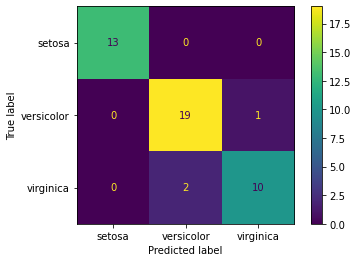

In [13]:
# Plotting confusion matrix 
plot_confusion_matrix(model, x_test, y_test)

In [14]:
# Checking important flower features:
model.feature_importances_

# Printing list
pd.DataFrame(index=x.columns, data = model.feature_importances_, columns = ['Important Features'])

,Important Features
sepal_length,0.081310
sepal_width,0.049837
petal_length,0.228887
petal_width,0.639966


In [18]:
# Testing error random forest
test_error = []
for n in range (1, 40):
    model = RandomForestClassifier(n_estimators = n, max_features = 'auto')
    model.fit(x_train, y_train)
    test_preds = model.predict(x_test)
    test_error.append(1 - accuracy_score(test_preds, y_test))

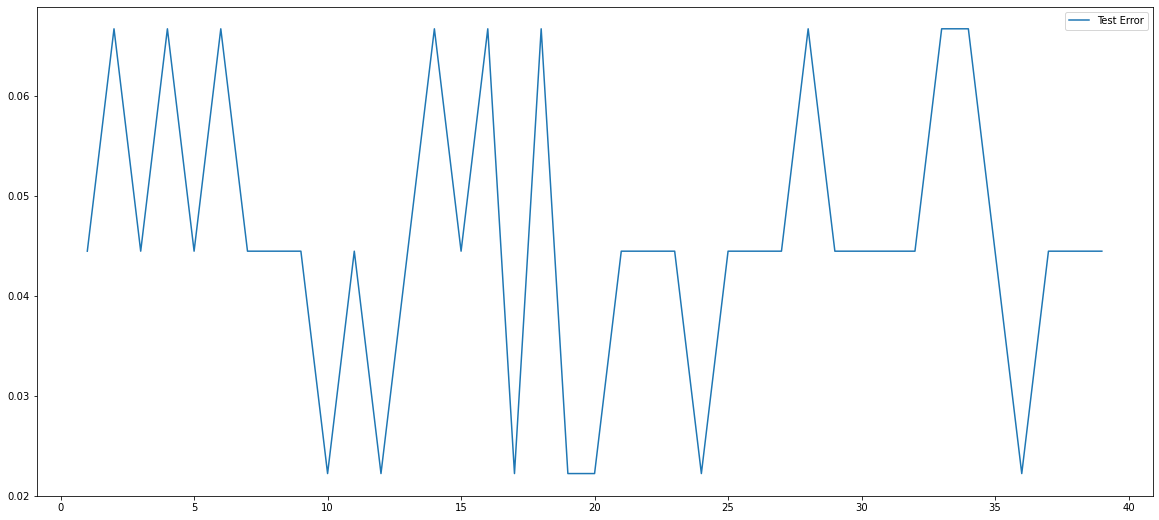

In [21]:
# Plotting accuracy graph for model
plt.figure(figsize=(20, 9))
plt.plot(range(1, 40), test_error, label = 'Test Error')
plt.legend()